In [ ]:
!pip install --upgrade pip
!pip install --upgrade unsloth unsloth_zoo
!pip install --no-deps xformers "trl<0.9.0" peft accelerate bitsandbytes
!pip install transformers datasets accelerate evaluate scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 35.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 20.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 46.9 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 51.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 79.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 MB 42.7 MB/s  0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 24.0 MB/s  0:00:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 120.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━

  Attempting uninstall: trl
    Found existing installation: trl 0.24.0
    Uninstalling trl-0.24.0:
      Successfully uninstalled trl-0.24.0


In [ ]:
from urllib import request
import pandas as pd
import logging
import torch
from collections import Counter
from ast import literal_eval

In [ ]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

# helper function to save predictions to an output file
def labels2file(p, outf_path):
	with open(outf_path,'w') as outf:
		for pi in p:
			outf.write(','.join([str(k) for k in pi])+'\n')

data_url = f"https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_pcl.tsv"
data_name = data_url.split('/')[-1]
print(f'Fetching {data_url}')
with request.urlopen(data_url) as f, open(data_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

from dont_patronize_me import DontPatronizeMe
dpm = DontPatronizeMe('.', '.')
dpm.load_task1()

train_labels_url = "https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/train_semeval_parids-labels.csv"
dev_labels_url = "https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/dev_semeval_parids-labels.csv"

# Download train_semeval_parids-labels.csv
print(f'Fetching {train_labels_url}')
with request.urlopen(train_labels_url) as f, open('train_semeval_parids-labels.csv','w') as outf:
  outf.write(f.read().decode('utf-8'))

# Download dev_semeval_parids-labels.csv
print(f'Fetching {dev_labels_url}')
with request.urlopen(dev_labels_url) as f, open('dev_semeval_parids-labels.csv','w') as outf:
  outf.write(f.read().decode('utf-8'))

trids = pd.read_csv('train_semeval_parids-labels.csv')
teids = pd.read_csv('dev_semeval_parids-labels.csv')
trids.par_id = trids.par_id.astype(str)
teids.par_id = teids.par_id.astype(str)
data=dpm.train_task1_df
data

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py
Fetching https://raw.githubusercontent.com/CRLala/NLPLabs-2024/main/Dont_Patronize_Me_Trainingset/dontpatronizeme_pcl.tsv
Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/train_semeval_parids-labels.csv
Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/practice%20splits/dev_semeval_parids-labels.csv


,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10464,10465,@@14297363,women,lk,"""Sri Lankan norms and culture inhibit women fr...",0,1
10465,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0,0
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",1,3
10467,10468,@@16753236,hopeless,in,""""""" Anja Ringgren Loven I ca n't find a word t...",1,4


Label Counts:
 label
0    9476
1     993
Name: count, dtype: int64


/tmp/ipython-input-2642646666.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


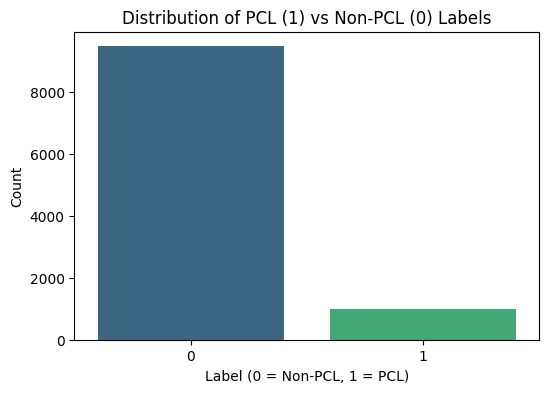

Percentage of PCL examples: 9.49%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute counts
label_counts = data['label'].value_counts()
print("Label Counts:\n", label_counts)

# 2. Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of PCL (1) vs Non-PCL (0) Labels')
plt.xlabel('Label (0 = Non-PCL, 1 = PCL)')
plt.ylabel('Count')
plt.show()

# Calculate percentage
pct_positive = (data['label'].sum() / len(data)) * 100
print(f"Percentage of PCL examples: {pct_positive:.2f}%")

Findings: The visualization confirms a severe class imbalance. The dataset is dominated by negative examples (Label 0).
Implication: The "Non-PCL" class represents roughly 90% of the data, meaning a "dummy" classifier that always predicts 0 would achieve ~90% accuracy but 0% recall. Metric Selection: I cannot use Accuracy as my primary metric, as it will be misleadingly high. I must use F1-Score, Precision, and Recall (specifically for the positive class) to correctly evaluate performance.

Training Strategy: I will implement class weights (penalising the model more for missing a positive example) or use stratified splitting for my validation set to ensure the minority class is represented in every fold.

count    10469.000000
mean        48.422485
std         29.091331
min          0.000000
25%         30.000000
50%         42.000000
75%         60.000000
max        909.000000
Name: text_length, dtype: float64


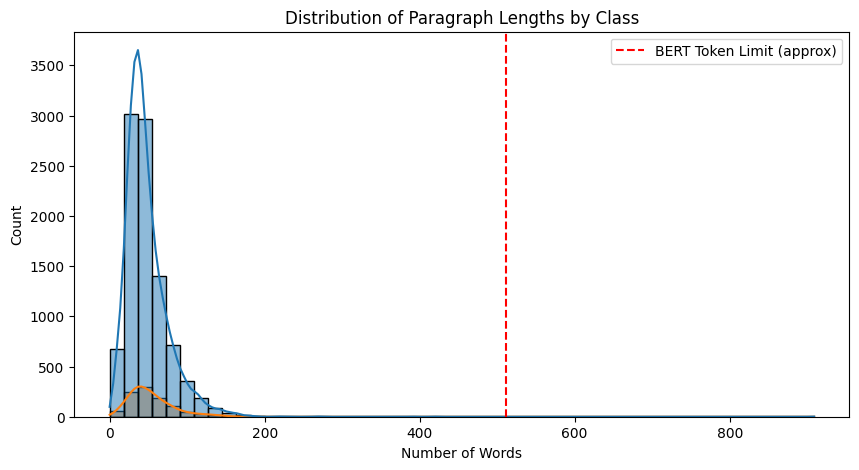

Rows identified as potential noise (< 8 words): 83
                                                  text  label
317                             The Filipino immigrant      0
486  Austria welcomes first migrant buses from Hungary      0
533             Institutions for disabled mull closure      0
590         PM defends record of helping poor families      1
593           Their refugee status remains unchanged !      0
Rows identified as too long (< 256 words): 6
                                                   text  label
292   "The following is a brief history of the Rajne...      0
5977  "Mahinda Wijesinghe , the Inspector General of...      0
6832  "Most are from desperately poor Horn of Africa...      1
7418  "Dr Mayengbam Lalit Singh Recently honourable ...      0
8191  ANNUAL State of Education Report ( ASER ) laun...      0


In [ ]:
# 1. Create a length column (approximate token count by splitting on whitespace)
data['text_length'] = data['text'].astype(str).apply(lambda x: len(x.split()))

# 2. Statistics
print(data['text_length'].describe())

# 3. Plot Histograms
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='text_length', hue='label', kde=True, bins=50)
plt.title('Distribution of Paragraph Lengths by Class')
plt.xlabel('Number of Words')
plt.axvline(x=512, color='r', linestyle='--', label='BERT Token Limit (approx)')
plt.legend()
plt.show()

# 4. Check for noise (very short texts)
noise_threshold = 8  # Example: texts with fewer than 5 words
noise_data = data[data['text_length'] < noise_threshold]
print(f"Rows identified as potential noise (< {noise_threshold} words):", len(noise_data))
print(noise_data[['text', 'label']].head())

upper = 256
upper_data = data[data['text_length'] > upper]
print(f"Rows identified as too long (< {upper} words):", len(upper_data))
print(upper_data[['text', 'label']].head())

Noise Identification: We identified 83 rows with a length of fewer than 8 words. Given that the dataset consists of news paragraphs, these short sequences are likely scraping artifacts (e.g., headers, bylines) rather than meaningful content. They represent less than 1% of the total data. As PCL relies on subtle linguistic markers and tone, these fragments lack sufficient context to be meaningfully labeled and likely constitute noise

Sequence Coverage: The vast majority of the data falls well under 256 tokens. Only 6 paragraphs exceed 256 words. This indicates that a sequence length of 256 will capture the full context for 99.9% of the dataset

Data Cleaning: I will filter out the 83 rows with fewer than 8 words. This removes noise that lacks sufficient context for the "subtle" detection of PCL  without significantly reducing the training volume.

Model Configuration: I will set the BERT tokenizer max_length to 256. This is a computationally efficient choice that covers 99.94% of the dataset. The 6 examples exceeding this length will be truncated, which is an acceptable loss given their rarity.

In [ ]:
print(f"Original Dataset Size: {len(data)}")

# Create the text_length feature (word count)
data['text_length'] = data['text'].astype(str).apply(lambda x: len(x.split()))

min_threshold = 8

# Filter the data
clean_data = data[data['text_length'] >= min_threshold].copy()

clean_data.head()

Original Dataset Size: 10469


,par_id,art_id,keyword,country,text,label,orig_label,text_length
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0,123
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0,41
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0,27
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0,30
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0,53


In [ ]:
def load_official_splits(tsv_path, train_ids_path, dev_ids_path):
    """
    Loads the DPM dataset and splits it using the OFFICIAL Train/Dev ID files.
    """
    print("Loading Master Dataset...")
    # 1. Load Master Data (Text + Scalar Labels)
    rows = []
    try:
        with open(tsv_path) as f:
            lines = f.readlines()[4:] # Skip header
            for line in lines:
                parts = line.strip().split('\t')
                if len(parts) < 6: continue

                par_id = parts[0]
                art_id = parts[1]
                keyword = parts[2]
                country = parts[3]
                text = parts[4]
                raw_label = parts[-1]

                try:
                    score = int(raw_label)
                except ValueError:
                    continue

                binary_label = 0 if score <= 1 else 1

                rows.append({
                    'par_id': par_id,
                    'art_id': art_id,
                    'keyword': keyword,
                    'country': country,
                    'text': text,
                    'orig_label': score,
                    'label': binary_label
                })
        master_df = pd.DataFrame(rows)
        print(f"Master Dataset Loaded: {len(master_df)} rows")

    except FileNotFoundError:
        print(f"Error: Could not find {tsv_path}")
        return pd.DataFrame(), pd.DataFrame()

    # 2. Load Official Split IDs
    try:
        train_ids_df = pd.read_csv(train_ids_path)
        dev_ids_df = pd.read_csv(dev_ids_path)

        # Ensure IDs are strings for merging
        master_df['par_id'] = master_df['par_id'].astype(str)
        train_ids_df['par_id'] = train_ids_df['par_id'].astype(str)
        dev_ids_df['par_id'] = dev_ids_df['par_id'].astype(str)

        print(f"Train IDs: {len(train_ids_df)} | Dev IDs: {len(dev_ids_df)}")

        # 3. Filter Master DF
        # We merge inner to keep only rows present in the ID files
        train_dpm = master_df[master_df['par_id'].isin(train_ids_df['par_id'])]
        val_dpm = master_df[master_df['par_id'].isin(dev_ids_df['par_id'])]

        print(f"Final Official Train Size: {len(train_dpm)}")
        print(f"Final Official Val Size: {len(val_dpm)}")

        return train_dpm, val_dpm

    except FileNotFoundError:
        print("Error: Could not find ID files. Please upload train_semeval_parids-labels.csv and dev_semeval_parids-labels.csv")
        return pd.DataFrame(), pd.DataFrame()


train_dpm, val_dpm = load_official_splits(
    "dontpatronizeme_pcl.tsv",
    "train_semeval_parids-labels.csv",
    "dev_semeval_parids-labels.csv"
)
train_dpm

Loading Master Dataset...
Master Dataset Loaded: 10469 rows
Train IDs: 8375 | Dev IDs: 2094
Final Official Train Size: 8375
Final Official Val Size: 2094


,par_id,art_id,keyword,country,text,orig_label,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""White House press secretary Sean Spicer said ...",0,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" Just like we received migrants fleeing El ...",0,0
...,...,...,...,...,...,...,...
10423,10424,@@4665292,women,jm,""""""" I do n't believe in abortion , I think it ...",3,1
10444,10445,@@3923193,refugee,gb,More than 150 volunteers spent the night in ' ...,3,1
10453,10454,@@22338535,vulnerable,ie,""""""" We are challenged , I suggest , to turn th...",4,1
10466,10467,@@20282330,in-need,ng,""""""" She has one huge platform , and informatio...",3,1


In [ ]:
import pandas as pd
import json
import os

!wget https://nlp.stanford.edu/~zijwang/talkdown/talkdown.tar.gz

!tar -xzvf talkdown.tar.gz


--2026-02-17 17:58:50--  https://nlp.stanford.edu/~zijwang/talkdown/talkdown.tar.gz
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... ^C
tar (child): talkdown.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
target_file = 'balanced_train.jsonl'
print(f"Processing {target_file}...")

df = pd.read_json(target_file, lines=True)

df = df.rename(columns={'quotedpost': 'text'})

# TalkDown uses "True" for Condescending
label_map = {True: 1, False: 0, "True": 1, "False": 0}
df['label'] = df['label'].map(label_map)

# We only want rows where we successfully mapped the label
df_clean = df[['text', 'label']].dropna()
df_clean['label'] = df_clean['label'].astype(int)

output_filename = 'talkdown_training.csv'
df_clean.to_csv(output_filename, index=False)

print(f"\nSUCCESS: Created '{output_filename}' with {len(df_clean)} rows.")
print("Sample:")
print(df_clean.head())
print(len(df_clean[df_clean['label'] == 1]))

Processing balanced_train.jsonl...


/tmp/ipython-input-2089154757.py:4: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(target_file, lines=True)


ValueError: Expected object or value

In [ ]:
# augment the training set with data from the talkdown dataset
def augment_with_talkdown(original_train_df, talkdown_jsonl_path):
    try:
        print(f"Processing TalkDown file: {talkdown_jsonl_path}...")
        td_df = pd.read_json(talkdown_jsonl_path, lines=True)
        if 'quotedpost' in td_df.columns: td_df = td_df.rename(columns={'quotedpost': 'text'})
        else: return original_train_df

        td_df['country'] = 'US'
        td_df['keyword'] = 'social_interaction'
        label_map = {True: 1, False: 0, "True": 1, "False": 0}
        td_df['label'] = td_df['label'].map(label_map).dropna().astype(int)

        # Map all PCL to '3' (Clear PCL)
        # This keeps the signal "TalkDown = PCL" strong
        td_df['orig_label'] = td_df['label'].apply(lambda x: 3 if x == 1 else 0)

        cols = ['text', 'label', 'keyword', 'country', 'orig_label']
        augmented_train = pd.concat([original_train_df, td_df[cols]], ignore_index=True)
        print(f"Augmentation Complete. New Train Size: {len(augmented_train)}")
        return augmented_train
    except Exception as e:
        print(f"Skipping Augmentation: {e}")
        return original_train_df

In [ ]:
import torch
from unsloth import FastLanguageModel
from datasets import Dataset, DatasetDict
import pandas as pd
from trl import SFTTrainer, DataCollatorForCompletionOnlyLM
from transformers import TrainingArguments, TrainerCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import numpy as np
import os
import random
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/drive')

drive_save_path = "/content/drive/MyDrive/NLP_PCL_Project"
os.makedirs(drive_save_path, exist_ok=True)
print(f"Models will be saved to: {drive_save_path}")

train_augmented = train_dpm# augment_with_talkdown(train_dpm, "balanced_train.jsonl")

alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Analyze the following text for Patronizing and Condescending Language (PCL) towards vulnerable communities.
Focus on the specific keyword: {keyword}.
First, assign a Severity Score from 0 (No PCL) to 4 (Severe PCL).
Second, provide the final Binary Verdict (PCL or Non-PCL).

### Input:
{text}

### Response:
"""

EOS_TOKEN = "<|endoftext|>"

def formatting_prompts_func(examples):
    instructions = []
    inputs      = examples["text"]
    keywords    = examples["keyword"]
    orig_labels = examples["orig_label"]
    binary_labels = examples["label"]

    for text, keyword, score, binary in zip(inputs, keywords, orig_labels, binary_labels):
        verdict = "PCL" if binary == 1 else "Non-PCL"
        output_text = f"Severity: {score}. Verdict: {verdict}."
        text = alpaca_prompt.format(keyword=keyword, text=text) + output_text + EOS_TOKEN
        instructions.append(text)
    return { "text" : instructions }

if not train_augmented.empty:
    dataset = DatasetDict({
        "train": Dataset.from_pandas(train_augmented),
        "test": Dataset.from_pandas(val_dpm)
    })
    dataset = dataset.map(formatting_prompts_func, batched = True)
else:
    print("Warning: Training data is empty.")

# load llama 3 8b model, quantized to fit on colab gpus
max_seq_length = 512
dtype = None
load_in_4bit = True

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/llama-3-8b-Instruct-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

# load loras for finetuning
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

# check that f1 score is increasing on validation set
class PulseCheckCallback(TrainerCallback):
    def __init__(self, tokenizer, validation_sample, step_freq=50):
        self.tokenizer = tokenizer
        self.validation_sample = validation_sample
        self.step_freq = step_freq

    def on_step_end(self, args, state, control, model=None, **kwargs):
        if state.global_step % self.step_freq == 0 and state.global_step > 0:
            print(f"\n--- Pulse Check at Step {state.global_step} ---")
            FastLanguageModel.for_inference(model)

            y_pred = []
            y_true = []
            total = len(self.validation_sample)

            for i, item in enumerate(self.validation_sample):
                text = item['text']
                keyword = item['keyword']
                label = item['label']
                prompt = alpaca_prompt.format(keyword=keyword, text=text)

                inputs = self.tokenizer([prompt], return_tensors="pt").to("cuda")
                outputs = model.generate(**inputs, max_new_tokens=20, use_cache=True)
                decoded = self.tokenizer.decode(outputs[0])
                response = decoded.split("### Response:\n")[-1].strip()

                pred_is_pcl = 1 if "Verdict: PCL" in response else 0
                y_pred.append(pred_is_pcl)
                y_true.append(label)

                if i == 0: # Print just one example
                    print(f"Sample Pred: {response} | True: {'PCL' if label==1 else 'Non-PCL'}")

            # Calculate F1 Score (Binary)
            # zero_division=0 prevents crashes if no positives are predicted
            f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)
            print(f"Pulse F1 Score (Pos Class): {f1:.3f}")

            FastLanguageModel.for_training(model)

val_sample = dataset['test'].select(range(10)).to_list()
pulse_callback = PulseCheckCallback(tokenizer, val_sample, step_freq=50)

#TRAINING
resume_training = False
if os.path.exists(drive_save_path) and len(os.listdir(drive_save_path)) > 0:
    print("Found checkpoints. Attempting RESUME...")
    resume_training = True

response_template = "### Response:\n"
collator = DataCollatorForCompletionOnlyLM(response_template, tokenizer=tokenizer)

if not train_augmented.empty:
    trainer = SFTTrainer(
        model = model,
        tokenizer = tokenizer,
        train_dataset = dataset["train"],
        dataset_text_field = "text",
        max_seq_length = max_seq_length,
        dataset_num_proc = 2,
        packing = False,
        args = TrainingArguments(
            per_device_train_batch_size = 2,
            gradient_accumulation_steps = 4,
            warmup_steps = 5,
            num_train_epochs = 1,
            learning_rate = 2e-4,
            fp16 = not torch.cuda.is_bf16_supported(),
            bf16 = torch.cuda.is_bf16_supported(),
            logging_steps = 10,
            save_strategy = "steps",
            save_steps = 100,
            save_total_limit = 2,
            output_dir = drive_save_path,
            optim = "adamw_8bit",
            weight_decay = 0.01,
            lr_scheduler_type = "linear",
            seed = 3407,
            report_to='none'
        ),
        data_collator=collator,
        callbacks=[pulse_callback]
    )
    trainer.train(resume_from_checkpoint=resume_training)
#INFERENCE
FastLanguageModel.for_inference(model)

def predict(text, keyword):
    prompt = alpaca_prompt.format(keyword=keyword, text=text)
    inputs = tokenizer([prompt], return_tensors = "pt").to("cuda")
    outputs = model.generate(**inputs, max_new_tokens = 20, use_cache = True)
    decoded = tokenizer.batch_decode(outputs)
    response = decoded[0].split("### Response:\n")[-1]
    return response

print("Running Inference on PURE DPM Validation Set...")
preds = []

if not val_dpm.empty:
    true_labels = val_dpm['label'].tolist()

    for text, keyword in tqdm(zip(val_dpm['text'], val_dpm['keyword']), total=len(val_dpm)):
        res = predict(text, keyword)
        if "Verdict: PCL" in res:
            preds.append(1)
        else:
            preds.append(0)

    print("\nFinal Classification Report:")
    print(classification_report(true_labels, preds))

    model.save_pretrained(drive_save_path)
    print(f"✅ Final model saved to Google Drive: {drive_save_path}")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
Mounted at /content/drive
Models will be saved to: /content/drive/MyDrive/NLP_PCL_Project


Map:   0%|          | 0/8375 [00:00<?, ? examples/s]

Map:   0%|          | 0/2094 [00:00<?, ? examples/s]

==((====))==  Unsloth 2026.2.1: Fast Llama patching. Transformers: 4.57.6.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.563 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.10.0+cu128. CUDA: 7.5. CUDA Toolkit: 12.8. Triton: 3.6.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.34. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Unsloth 2026.2.1 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


Found checkpoints. Attempting RESUME...


Map (num_proc=2):   0%|          | 0/8375 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 8,375 | Num Epochs = 1 | Total steps = 1,047
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040 of 8,072,204,288 (0.52% trained)


Step,Training Loss


Running Inference on PURE DPM Validation Set...


100%|██████████| 2094/2094 [1:02:49<00:00,  1.80s/it]



Final Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1895
           1       0.58      0.25      0.35       199

    accuracy                           0.91      2094
   macro avg       0.75      0.62      0.65      2094
weighted avg       0.89      0.91      0.90      2094

✅ Final model saved to Google Drive: /content/drive/MyDrive/NLP_PCL_Project
